<a href="https://colab.research.google.com/github/Beebruna/Iniciacao-Cientifica/blob/main/Exemplo_C%C3%B3digo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Arquivo CSV (Comma Separated Value) = valores separados por vírgulas
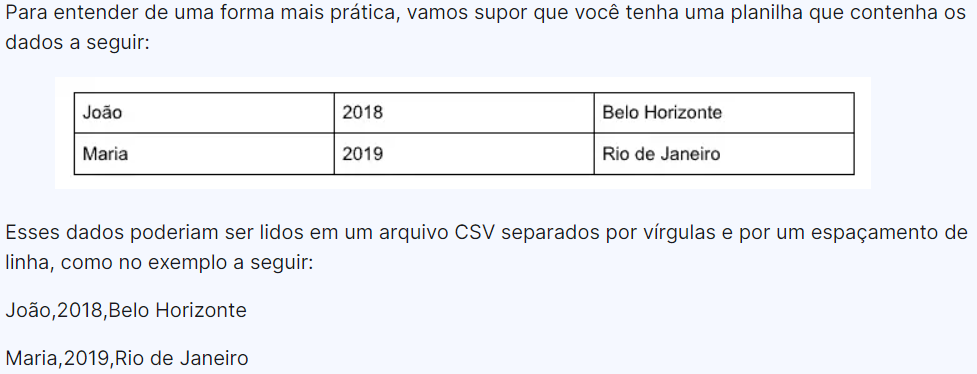

In [6]:
import pandas as pd

#df = DataFrame
df = pd.read_csv('/content/drive/MyDrive/Iniciação Científica/Practice - Code/Códigos Machine Learning/wine_dataset.csv')

In [8]:
#mostra as primeiras linhas do DataFrame
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
#renomeia os valores das colunas
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [15]:
df.shape #mostra o tamanho do DataFrame

(6497, 13)

In [ ]:
#Separando as variáveis entre preditoras e variável alvo
y = df['style'] #variável alvo
x = df.drop('style', axis = 1) #exlui a coluna style do DataFrame e armazena em x

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: style, Length: 6497, dtype: int64

In [14]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [23]:
#Separando as variáveis em conjunto de treino e conjunto de teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3) #separa aleatoriamente 30% para as variáveis de teste

In [24]:
#usando um algoritmo de machine learning já pronto
from sklearn.ensemble import ExtraTreesClassifier

#Criação do Modelo:
modelo = ExtraTreesClassifier()
modelo.fit(x_treino, y_treino)

#Imprimindo Resultados:
resultado = modelo.score(x_teste, y_teste)
print('Acurácia: ', resultado)

Acurácia:  0.9958974358974358


In [26]:
y_teste[400:403]

4002    1
6026    1
4228    1
Name: style, dtype: int64

In [27]:
x_teste[400:403]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4002,8.8,0.33,0.36,2.1,0.034,19.0,125.0,0.99166,2.96,0.98,12.7,6
6026,6.3,0.32,0.26,12.3,0.044,24.0,205.0,0.99611,3.11,0.58,9.9,5
4228,5.8,0.60,0.00,1.3,0.044,72.0,197.0,0.99202,3.56,0.43,10.9,5


In [25]:
#Verifica que o modelo está realmente treinado prevendo dados que nunca lhe foram apresentados
previsoes = modelo.predict(x_teste[400:403])
previsoes

array([1, 1, 1])